<a href="https://colab.research.google.com/github/hsantos1985/neural_network/blob/main/APLICACAO_REDE_NEURAL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Redes neurais
####Aplicações para treinamento e redes neurais densas
####Dataset - Iris



##Formação de modelos de Redes Neurais
####Aplicação de regressão para prever valor contínuo
####Mudança da formatação da rede
####Aplicação de novas camadas
####Aplicação de novas funções de perda
####Aplicação de nova função de saída

##Objetivo
####Prever o comprimento da pétala

##1-Bibliotecas

In [37]:
import tensorflow as tf
import keras
from keras.utils import plot_model

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import MinMaxScaler

from keras.models import *
from keras.layers import *

import matplotlib.pyplot as plt

In [34]:
!pip install keras-visualizer

In [35]:
#função para plotagem dos modelos
from keras_visualizer import visualizer
from PIL import Image
def plot_nn(model, setting={}):
    visualizer(model, view=True, file_name='output', file_format='png', settings=setting)
    img = Image.open('output.png')
    return img

##2-Criação da ABT - Analytical Base Table

In [95]:
#carregamento dos dados
iris = datasets.load_iris()

In [39]:
#transforação das colunas - retirada dos espaços
colunas = []

for c in iris.feature_names:
    colunas.append(c.replace(' ', '_').replace('(', '').replace(')', ''))

In [40]:
#colunas
iris_final=pd.DataFrame(iris.data, columns=colunas)
iris_final.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [41]:
iris_final.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm'],
      dtype='object')

In [42]:
#target iris
iris_final['target']=iris.target

In [43]:
iris_final.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [44]:
#utilizando a coluna target para buscar os tipos de rosa
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
#dummizando a target
iris_dummies=pd.DataFrame(keras.utils.to_categorical(iris.target), columns=iris['target_names'])
iris_dummies

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [46]:
#unindo os dfs para formar a base abt
abt_final=pd.concat([iris_final,iris_dummies], axis=1)
abt_final

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,2,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,2,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,2,0.0,0.0,1.0


In [47]:
abt_final['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [48]:
abt_final.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'target', 'setosa', 'versicolor', 'virginica'],
      dtype='object')

In [49]:
#separação das ariáveis explicatias e target
X=abt_final[['sepal_length_cm','sepal_width_cm','petal_width_cm','setosa','versicolor','virginica']]
y=abt_final['petal_length_cm']


In [50]:
#Split da base abt final em treino e teste, usar o stratify para manter a proporção das classes no treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, stratify=abt_final.target.values)

In [51]:
X_train['versicolor'].value_counts()

versicolor
0.0    70
1.0    35
Name: count, dtype: int64

In [52]:
X_train['virginica'].value_counts()

virginica
0.0    70
1.0    35
Name: count, dtype: int64

In [53]:
X_train['setosa'].value_counts()

setosa
0.0    70
1.0    35
Name: count, dtype: int64

#3-Criação dos modelos



In [58]:
#modelo 1
modelo1 = Sequential()
modelo1.add(Input(shape=(6, ),name='camada_entrada'))
modelo1.add(Dense(10, activation='tanh'))
modelo1.add(Dense(20, activation='tanh'))
modelo1.add(Dense(1, activation='relu', name='camada_saida'))

#otimizador e função de perda
modelo1.compile(loss='mse', metrics='mae')


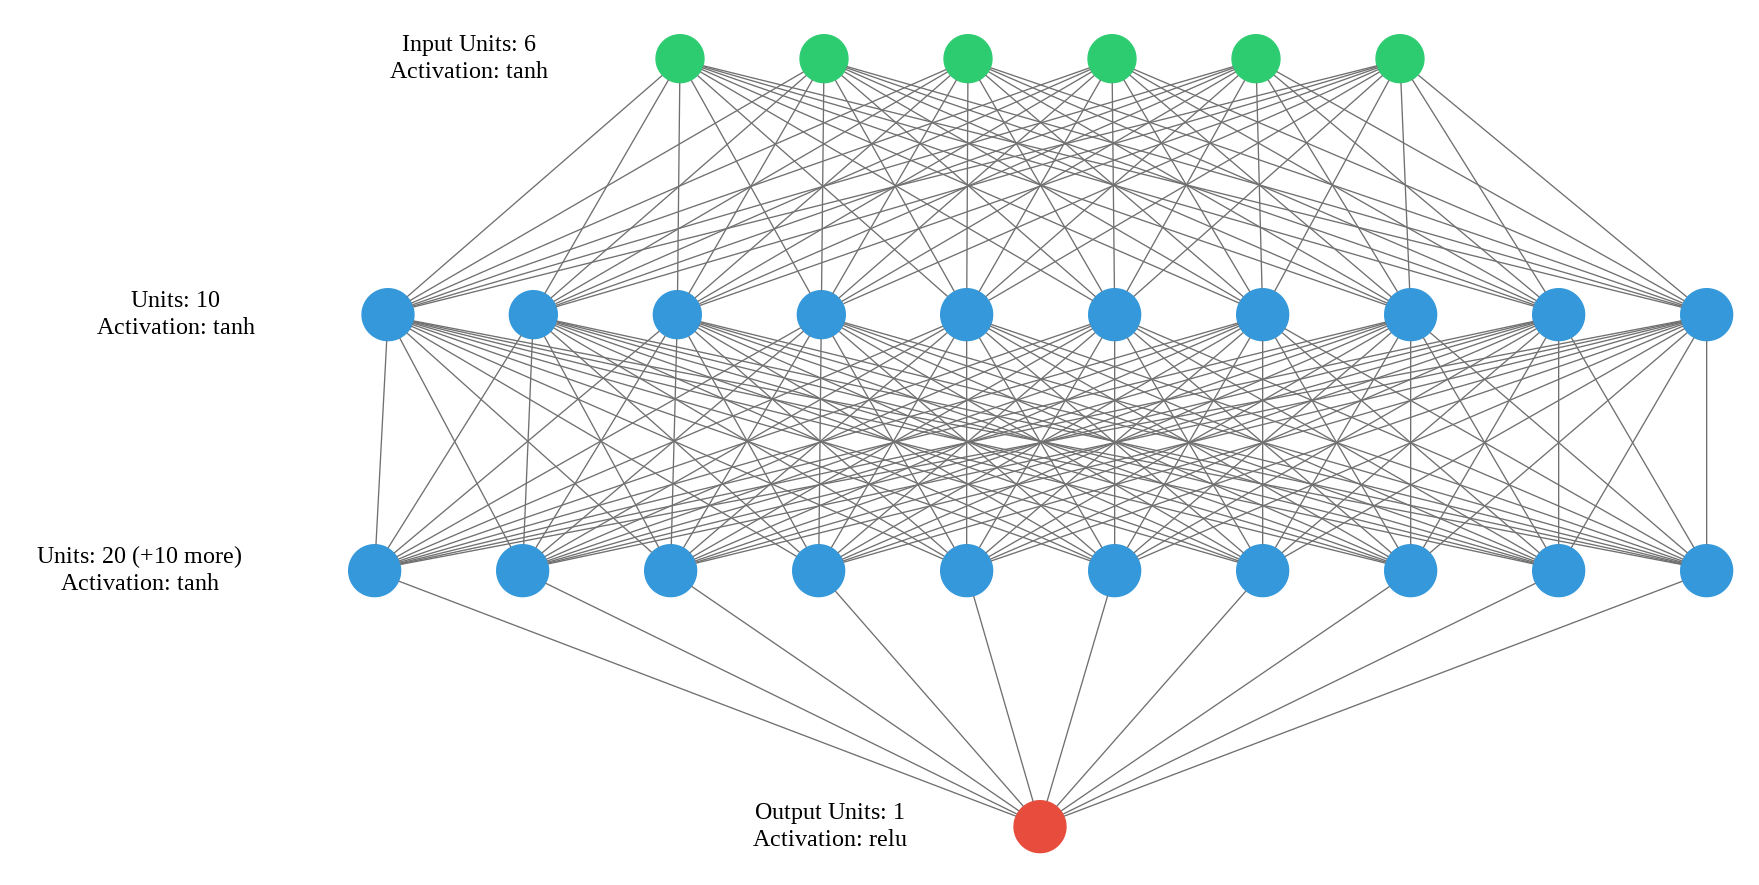

In [59]:
plot_nn(modelo1)

In [60]:
#aplicando o fit do modelo na base de teste
hist1 = modelo1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32)

Epoch 1/150
4/4 [==============================] - 1s 70ms/step - loss: 14.4347 - mae: 3.4043 - val_loss: 12.9923 - val_mae: 3.1959
Epoch 2/150
4/4 [==============================] - 0s 21ms/step - loss: 11.6235 - mae: 2.9964 - val_loss: 10.9511 - val_mae: 2.8630
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 9.8434 - mae: 2.6823 - val_loss: 9.4569 - val_mae: 2.5928
Epoch 4/150
4/4 [==============================] - 0s 13ms/step - loss: 8.4951 - mae: 2.4233 - val_loss: 8.2730 - val_mae: 2.3623
Epoch 5/150
4/4 [==============================] - 0s 19ms/step - loss: 7.4097 - mae: 2.2047 - val_loss: 7.2277 - val_mae: 2.1593
Epoch 6/150
4/4 [==============================] - 0s 19ms/step - loss: 6.4639 - mae: 2.0424 - val_loss: 6.3509 - val_mae: 2.0402
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 5.6522 - mae: 1.9437 - val_loss: 5.5591 - val_mae: 1.9613
Epoch 8/150
4/4 [==============================] - 0s 18ms/step - loss: 4.9450 - mae: 

In [85]:
#modelo 2
#utilizando outras funções de atiação nas camadas ocultas

modelo2 = Sequential()
modelo2.add(Input(shape=(6, ),name='camada_entrada'))
modelo2.add(Dense(10, activation='relu'))
modelo2.add(Dense(20, activation='tanh'))
modelo2.add(Dense(5, activation='tanh'))
modelo2.add(Dense(1, activation='relu', name='camada_saida'))

#otimizador e função de perda
modelo2.compile(loss='mse', metrics='mae')

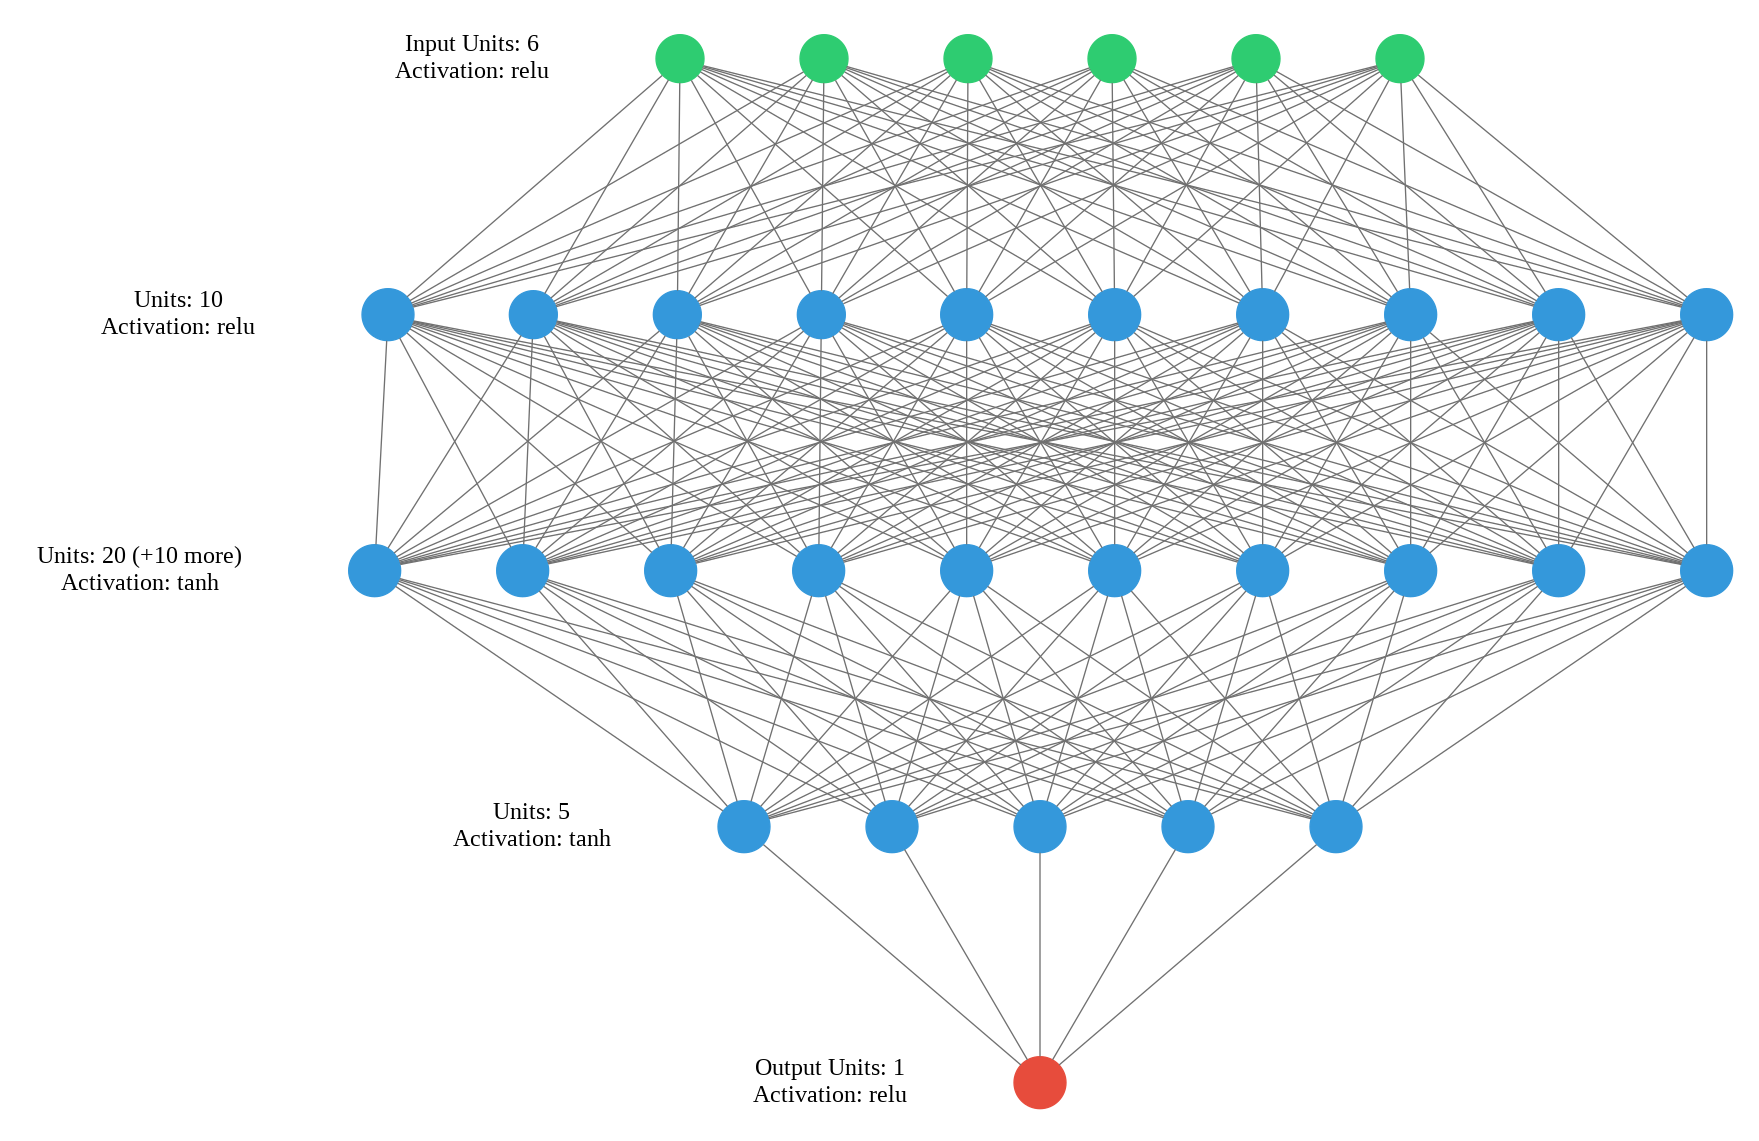

In [86]:
plot_nn(modelo2)

In [87]:
#aplicando o fit do modelo na base de teste
hist2 = modelo2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=32)

Epoch 1/250
4/4 [==============================] - 1s 86ms/step - loss: 10.7762 - mae: 2.7151 - val_loss: 10.1615 - val_mae: 2.6038
Epoch 2/250
4/4 [==============================] - 0s 16ms/step - loss: 9.3309 - mae: 2.4795 - val_loss: 9.3032 - val_mae: 2.4705
Epoch 3/250
4/4 [==============================] - 0s 13ms/step - loss: 8.6119 - mae: 2.3753 - val_loss: 8.7608 - val_mae: 2.3924
Epoch 4/250
4/4 [==============================] - 0s 18ms/step - loss: 8.1401 - mae: 2.3150 - val_loss: 8.3670 - val_mae: 2.3430
Epoch 5/250
4/4 [==============================] - 0s 18ms/step - loss: 7.7845 - mae: 2.2696 - val_loss: 8.0295 - val_mae: 2.3026
Epoch 6/250
4/4 [==============================] - 0s 13ms/step - loss: 7.4844 - mae: 2.2373 - val_loss: 7.7705 - val_mae: 2.2747
Epoch 7/250
4/4 [==============================] - 0s 20ms/step - loss: 7.2445 - mae: 2.2098 - val_loss: 7.5559 - val_mae: 2.2533
Epoch 8/250
4/4 [==============================] - 0s 13ms/step - loss: 7.0474 - mae: 2.

#4-Comparação dos modelos

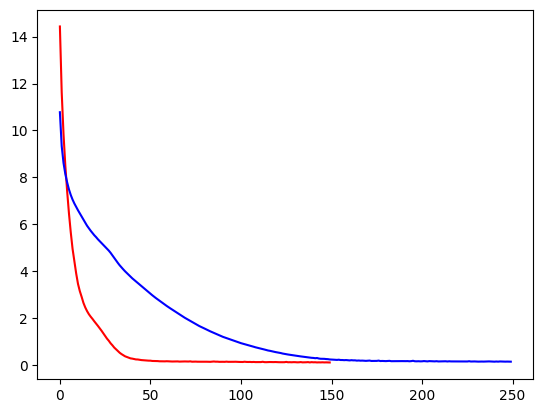

In [88]:
#perda
import matplotlib.pyplot as plt
plt.plot(hist1.history['loss'], 'r')
plt.plot(hist2.history['loss'], 'b')

In [89]:
#ambos os modelos atingem os mesmos níeis de perdas
#contudo o modelo 1 atinge o nível mínimo mais rapidamente

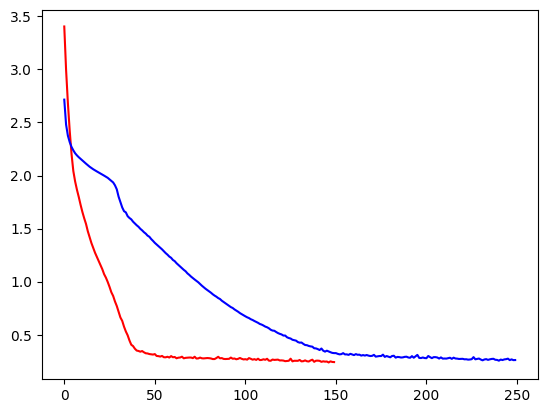

In [91]:
#Mae
import matplotlib.pyplot as plt
plt.plot(hist1.history['mae'], 'r')
plt.plot(hist2.history['mae'], 'b')

In [94]:
#assim como na perda, o modelo 1 atinge o menor níel de erro médio absoluto antes que o modelo 2
#Conclui-se desta forma, que o modelo 1 é mais eficiente